In [1]:
%matplotlib widget
import sys
sys.path.append('..')
from evaluation.generated_dataset import GeneratedDataset

/home/kna/.cache/pypoetry/virtualenvs/wyckofftransformer-FeCwefly-py3.12/lib/python3.12/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


In [2]:
trnasformations = {
    "raw": ("DiffCSP", "1k-sample", "DFT"),
    "CHGNet": ("DiffCSP", "1k-sample", "CHGNet_free", "DFT"),
    "Eq-V2": ("DiffCSP", "1k-sample", "eq-V2_free", "DFT"),
}
datasets = {
    key: GeneratedDataset.from_transformations(transformations=value) for key, value in trnasformations.items()
}

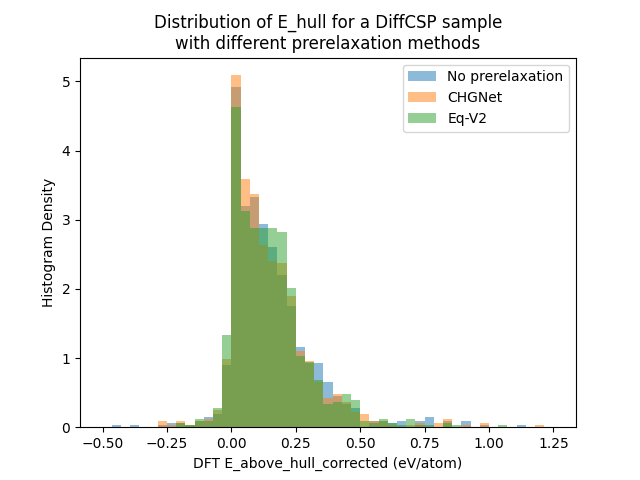

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
bins = np.linspace(-0.5, 1.25, 50)
ax.hist(datasets["raw"].data.e_above_hull_corrected, bins=bins, label="No prerelaxation", alpha=0.5, density=True)
ax.hist(datasets["CHGNet"].data.e_above_hull_corrected, bins=bins, label="CHGNet", alpha=0.5, density=True)
ax.hist(datasets["Eq-V2"].data.e_above_hull_corrected, bins=bins, label="Eq-V2", alpha=0.5, density=True)
ax.set_xlabel("DFT E_above_hull_corrected (eV/atom)")
ax.set_ylabel("Histogram Density")
ax.set_title("Distribution of E_hull for a DiffCSP sample\nwith different prerelaxation methods")
ax.legend();